# Linear Regression Introduction

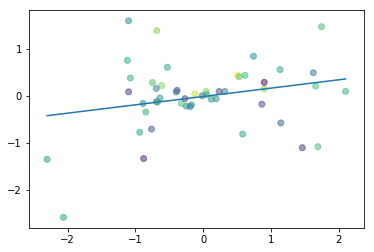

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

# Linear Regression in PyTorch

In [3]:
x_values = [i for i in range(11)]

In [5]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [8]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [9]:
y_values = [2*i + 1 for i in x_values]

In [10]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)

In [12]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [13]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [15]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [16]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [17]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [18]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [19]:
criterion = nn.MSELoss()

In [20]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
epochs = 100

In [22]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 98.76132202148438
epoch 2, loss 8.190764427185059
epoch 3, loss 0.8017014861106873
epoch 4, loss 0.19750794768333435
epoch 5, loss 0.14675039052963257
epoch 6, loss 0.1411513090133667
epoch 7, loss 0.1392521858215332
epoch 8, loss 0.13767081499099731
epoch 9, loss 0.13613128662109375
epoch 10, loss 0.1346108466386795
epoch 11, loss 0.13310779631137848
epoch 12, loss 0.1316213756799698
epoch 13, loss 0.13015152513980865
epoch 14, loss 0.12869806587696075
epoch 15, loss 0.1272609382867813
epoch 16, loss 0.12583981454372406
epoch 17, loss 0.12443461269140244
epoch 18, loss 0.12304505705833435
epoch 19, loss 0.12167112529277802
epoch 20, loss 0.12031235545873642
epoch 21, loss 0.11896887421607971
epoch 22, loss 0.11764038354158401
epoch 23, loss 0.11632683128118515
epoch 24, loss 0.11502780765295029
epoch 25, loss 0.11374320834875107
epoch 26, loss 0.11247312277555466
epoch 27, loss 0.11121711879968643
epoch 28, loss 0.1099751889705658
epoch 29, loss 0.1087469756603241
epoch 

/Users/robertlowe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


In [23]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.58824766],
       [ 2.647544  ],
       [ 4.70684   ],
       [ 6.766136  ],
       [ 8.825432  ],
       [10.8847275 ],
       [12.944024  ],
       [15.003321  ],
       [17.062616  ],
       [19.121912  ],
       [21.181208  ]], dtype=float32)

In [24]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

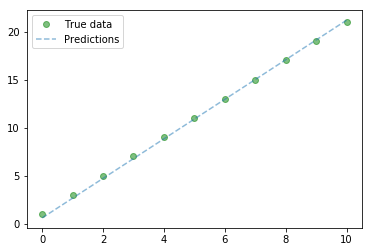

In [25]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

In [27]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [28]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

# Linear Regression From CPU to GPU in PyTorch

In [29]:
import torch
import torch.nn as nn
from torch.autograd import Variable

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

In [30]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

if torch.cuda.is_available():
    model.cuda()

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 277.138671875
epoch 2, loss 22.610790252685547
epoch 3, loss 1.8496936559677124
epoch 4, loss 0.15621532499790192
epoch 5, loss 0.018024103716015816
epoch 6, loss 0.006693154573440552
epoch 7, loss 0.005710579454898834
epoch 8, loss 0.00557277025654912
epoch 9, loss 0.005504520144313574
epoch 10, loss 0.005442566704005003
epoch 11, loss 0.005381727125495672
epoch 12, loss 0.005321620497852564
epoch 13, loss 0.005262194201350212
epoch 14, loss 0.005203415174037218
epoch 15, loss 0.00514530623331666
epoch 16, loss 0.005087857134640217
epoch 17, loss 0.005031044594943523
epoch 18, loss 0.0049748546443879604
epoch 19, loss 0.00491931801661849
epoch 20, loss 0.004864395130425692
epoch 21, loss 0.004810063634067774
epoch 22, loss 0.004756373353302479
epoch 23, loss 0.004703204613178968
epoch 24, loss 0.004650718066841364
epoch 25, loss 0.00459879357367754
epoch 26, loss 0.004547413904219866
epoch 27, loss 0.004496620036661625
epoch 28, loss 0.00444644084200263
epoch 29, loss 0.

/Users/robertlowe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
